# Getting Data

In [1]:
from collections import Counter
import math, random, csv, json, re

from bs4 import BeautifulSoup
import requests

In [2]:
requests.get('https://www.gutenberg.org/files/2701/old/moby10b.txt').text[:1000]

"**The Project Gutenberg Etext of Moby Dick, by Herman Melville**\r\n#3 in our series by Herman Melville\r\n\r\nThis Project Gutenberg version of Moby Dick is based on a combination\r\nof the etext from the ERIS project at Virginia Tech and another from\r\nProject Gutenberg's archives, as compared to a public-domain hard copy.\r\n\r\nCopyright laws are changing all over the world, be sure to check\r\nthe copyright laws for your country before posting these files!!\r\n\r\nPlease take a look at the important information in this header.\r\nWe encourage you to keep this file on your own disk, keeping an\r\nelectronic path open for the next readers.  Do not remove this.\r\n\r\n\r\n**Welcome To The World of Free Plain Vanilla Electronic Texts**\r\n\r\n**Etexts Readable By Both Humans and By Computers, Since 1971**\r\n\r\n*These Etexts Prepared By Hundreds of Volunteers and Donations*\r\n\r\nInformation on contacting Project Gutenberg to get Etexts, and\r\nfurther information is included belo

If some module is not installed, for example, beautifulsoup,
- googling: anaconda how to install beautifulsoup
- Find anaconda cloud in google answer, where the modules are tested and safe.

As a data scientist you will spend an **embarrassingly large fraction of your time** 
- acquiring, 
- cleaning, 
- and transforming data. 

## stdin and stdout

### Number of lines containing numbers
- You could then use these to count how many lines of a file contain numbers.
- you can pipe data through them using sys.stdin and sys.stdout .

In [6]:
# egrep.py
import sys, re

# sys.argv is the list of command-line arguments
# sys.argv[0] is the name of the program itself
# sys.argv[1] will be the regex specified at the command line
regex = sys.argv[1]

# for every line passed into the script
for line in sys.stdin:
    # if it matches the regex, write it to stdout
    if re.search(regex, line):
        sys.stdout.write(line)

In [7]:
# line_count.py
import sys

count = 0
for line in sys.stdin:
    count += 1
    
# print goes to sys.stdout
print(count)

0


In [3]:
# windows 

!type the_bible.txt | python egrep.py "^[0-9]" | python line_count.py

25019


In [ ]:
!type the_bible.txt

### Most Common Words

- a script that counts the words in its input and writes out the most common ones

In [ ]:
import sys
from collections import Counter

# pass in number of words as first argument
try:
    num_words = int(sys.argv[1])
except:
    print("usage: most_common_words.py num_words")
    sys.exit(1)

counter = Counter(word.lower()                        # non-zero exit code indicates error
                  for line in sys.stdin               # lowercase words
                  for word in line.strip().split()    # split on spaces
                  if word)                            # skip empty 'words'

for word, count in counter.most_common(num_words):
    sys.stdout.write(str(count))
    sys.stdout.write("\t")
    sys.stdout.write(word)
    sys.stdout.write("\n")

In [6]:
# windows

!type the_bible.txt | python most_common_words.py 10

64193	the
51380	and
34753	of
13643	to
12799	that
12560	in
10263	he
9840	shall
8987	unto
8836	for


In [141]:
# windows
# moby dick

!type moby10b.txt | python most_common_words.py 10

14303	the
6611	of
6277	and
4635	a
4576	to
4076	in
2754	that
2485	his
1781	it
1725	i


## Reading Files

### The Basics of Text Files

In [ ]:
# 'r' means read-only
file_for_reading = open('reading_file.txt', 'r')

# 'w' is write—will destroy the file if it already exists!
file_for_writing = open('writing_file.txt', 'w')

# 'a' is append—for adding to the end of the file
file_for_appending = open('appending_file.txt', 'a')

# don't forget to close your files when you're done
file_for_writing.close()

Because it is easy to forget to close your files, you should always use them in a **with**
block, at the end of which they will be **closed automatically**

In [ ]:
with open(filename,'r') as f:
    data = function_that_gets_data_from(f)

# at this point f has already been closed, so don't try to use it
process(data)

In [ ]:
!dir

In [4]:
starts_with_numbers = 0

with open('the_bible.txt','r') as file:
    for line in file:                 # look at each line in the file
        if re.match("^[0-9]", line):       # use a regex to see if it starts with numbers
            starts_with_numbers += 1     # if it does, add 1 to the count
            
starts_with_numbers

25019

In [ ]:
!type the_bible.txt

In [5]:
def get_domain(email_address):
    """split on '@' and return the last piece"""
    return email_address.lower().split("@")[-1]

with open('email_addresses.txt', 'r') as f:
    domain_counts = Counter(get_domain(line.strip())
                            for line in f
                            if "@" in line)
print(domain_counts)

Counter({'hufs.ac.kr': 2, 'naver.com': 1})


In [2]:
!type email_addresses.txt

ksohn@hufs.ac.kr
kimsa@hufs.ac.kr
ksohn@naver.com


### Delimited Files

- csv file : These files are very often either comma-separated or tab-separated.

In [6]:
!type tab_delimited_stock_prices.txt

6/20/2014	AAPL	90.91
6/20/2014	MSFT	41.68
6/20/2014	FB	64.5
6/19/2014	AAPL	91.86
6/19/2014	MSFT	41.51
6/19/2014	FB	64.34


In [7]:
import csv
with open('tab_delimited_stock_prices.txt', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        date = row[0]
        symbol = row[1]
        closing_price = float(row[2])
        print(date, symbol, closing_price)

6/20/2014 AAPL 90.91
6/20/2014 MSFT 41.68
6/20/2014 FB 64.5
6/19/2014 AAPL 91.86
6/19/2014 MSFT 41.51
6/19/2014 FB 64.34


In [ ]:
help(csv)

In [8]:
!type colon_delimited_stock_prices.txt

date:symbol:closing_price
6/20/2014:AAPL:90.91
6/20/2014:MSFT:41.68
6/20/2014:FB:64.5


In [145]:
with open('colon_delimited_stock_prices.txt', 'r') as f:
    reader = csv.DictReader(f, delimiter=':')
    for row in reader:
        date = row["date"]
        symbol = row["symbol"]
        closing_price = float(row["closing_price"])
        print(date, symbol, closing_price)

6/20/2014 AAPL 90.91
6/20/2014 MSFT 41.68
6/20/2014 FB 64.5


In [ ]:
help(csv)

In [148]:
!type comma_delimited_stock_prices_1.txt

AAPL,90.91

MSFT,41.68

FB,64.5



In [147]:
today_prices = { 'AAPL' : 90.91, 'MSFT' : 41.68, 'FB' : 64.5 }

with open('comma_delimited_stock_prices_1.txt','w') as f:
    writer = csv.writer(f, delimiter=',')
    for stock, price in today_prices.items():
        writer.writerow([stock, price])

In [13]:
!type bad_csv.txt

test1,success,Monday
test2,success, kind of,Tuesday
test3,failure, kind of,Wednesday
test4,failure, utter,Thursday


In [14]:
results = [["test1", "success", "Monday"],
           ["test2", "success, kind of", "Tuesday"],
           ["test3", "failure, kind of", "Wednesday"],
           ["test4", "failure, utter", "Thursday"]]

# don't do this!
with open('bad_csv.txt', 'w') as f:
    for row in results:
        f.write(",".join(map(str, row))) # might have too many commas in it!
        f.write("\n")                    # row might have newlines as well!

In [149]:
results = [["test1", "success", "Monday"],
           ["test2", "success, kind of", "Tuesday"],
           ["test3", "failure, kind of", "Wednesday"],
           ["test4", "failure, utter", "Thursday"]]

# Do this!
# Use csv.writer
with open('good_csv.txt', 'w') as f:
    writer = csv.writer(f, delimiter=',')
    for row in results:
        writer.writerow(row)

In [150]:
!type good_csv.txt

test1,success,Monday

test2,"success, kind of",Tuesday

test3,"failure, kind of",Wednesday

test4,"failure, utter",Thursday



## Scraping the Web

- Another way to get data is by scraping it from web pages

### HTML and Parsing

- for python3:
    - pip install html5lib
    - pip install beautifulsoup4

- for anaconda
    - conda install -c anaconda html5lib
         - https://anaconda.org/anaconda/html5lib
    - conda install -c anaconda beautifulsoup4
        - https://anaconda.org/anaconda/beautifulsoup4

In [15]:
import bs4

<img src="https://www.researchgate.net/profile/Olfa_Nasraoui/publication/221417012/figure/download/fig2/AS:669043992322053@1536523926785/Dom-Tree-of-An-Example-Web-Page.png">

<body>
    <h1>DOM Lesson one</h1>
    <p>Hello World!</p>
    <table>
        <tr class="people">
            <td>John</td>
            <td>Doe</td>
            <td>Alaska</td>
        </tr>
    </table>
</body>

In [10]:
from bs4 import BeautifulSoup

html = """
<html>
  <head>
    <title>A web page</title>
  </head>
  <body>
    <p id="author">Joel Grus</p>
    <p id="subject">Data Science</p>
    <p class="price">30</p>
  </body>
</html>"""

soup = BeautifulSoup(html, 'html5lib')

In [20]:
soup.head('p')

[]

Query 1: Find **title**

In [17]:
soup.title

<title>A web page</title>

In [18]:
soup.p

<p id="author">Joel Grus</p>

Query 2: Find **title**'s **text**

In [19]:
soup.title.text

'A web page'

Query 3: Find **p** of **body**

In [178]:
soup.body.p

<p id="author">Joel Grus</p>

Query 4: Find all **p** under **body**

In [17]:
soup.body('p')

[<p id="author">Joel Grus</p>,
 <p id="subject">Data Science</p>,
 <p class="price">30</p>]

Query 5: Find second **p**'s **text** of **body**

In [180]:
soup.body('p')[1].text

'Data Science'

Query 6: Find last **p** of **body**

In [181]:
soup.body('p')[-1]

<p class="price">30</p>

Query 7: Loop over all **p** of **body**

In [21]:
for i, p in enumerate(soup.body('p')):
    print('paragraph {}: {}'.format(i, p.text))

paragraph 0: Joel Grus
paragraph 1: Data Science
paragraph 2: 30


Query 8: Find first **p**'s **id** attribute's value

In [182]:
soup.p['id']

'author'

Query 9: Find all **p** whose attribute **id** is 'author'

In [183]:
soup('p', {'id':'author'})

[<p id="author">Joel Grus</p>]

Query 10: Find all **p** whose attribute **class** is 'price'

In [22]:
soup('p', 'price')
#soup('p', {'class':'price'})

[<p class="price">30</p>]

Query 11: Find all **text**s

In [185]:
soup.text

'\n    A web page\n  \n  \n    Joel Grus\n    Data Science\n    30\n  \n'

In [50]:
first_paragraph = soup.find('p')     # or just soup.p
print(first_paragraph)
print(type(first_paragraph))

<p id="author">Joel Grus</p>
<class 'bs4.element.Tag'>


In [51]:
first_paragraph_text = soup.p.text
first_paragraph_text

'Joel Grus'

In [52]:
first_paragraph_words = soup.p.text.split()
first_paragraph_words

['Joel', 'Grus']

In [188]:
first_paragraph_id = soup.p['id']        # raises KeyError if no 'id'
first_paragraph_id
#type(soup.p)

'author'

In [190]:
first_paragraph_id2 = soup.p.get('id')   # returns None if no 'id'
first_paragraph_id2

In [23]:
all_paragraphs = soup.find_all('p')      # or just soup('p')
all_paragraphs

[<p id="author">Joel Grus</p>,
 <p id="subject">Data Science</p>,
 <p class="price">30</p>]

In [24]:
soup('p')

[<p id="author">Joel Grus</p>,
 <p id="subject">Data Science</p>,
 <p class="price">30</p>]

In [25]:
soup('p', {'id':'subject'})

[<p id="subject">Data Science</p>]

In [26]:
paragraphs_with_ids = [p for p in soup('p') if p.get('id')]
paragraphs_with_ids

[<p id="author">Joel Grus</p>, <p id="subject">Data Science</p>]

In [27]:
important_paragraphs = soup('p', {'class' : 'important'})

In [28]:
html = requests.get("http://www.naver.com").text
soup = BeautifulSoup(html, 'html5lib')

In [30]:
# warning, will return the same span multiple times
# if it sits inside multiple divs
# be more clever if that's the case
spans_inside_divs = [span
                     for div in soup('div')    # for each <div> on the page
                     for span in div('span')]  # find each <span> inside it

In [31]:
spans_inside_divs

[<span>뉴스스탠드 바로가기</span>,
 <span>주제별캐스트 바로가기</span>,
 <span>타임스퀘어 바로가기</span>,
 <span>쇼핑캐스트 바로가기</span>,
 <span>로그인 바로가기</span>,
 <span class="_1syGnXOL _3VkgqBXB" data-clk="dropbanner1a" style="padding-right: 20px; font-size: 17px; color: black"><span>매일 쓰는 브라우저 보안이 걱정된다면, </span><strong>안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요.</strong></span>,
 <span>매일 쓰는 브라우저 보안이 걱정된다면, </span>,
 <span style="background-color: #0436c7">다운로드</span>,
 <span class="blind">네이버</span>,
 <span class="blind">쥬니어네이버</span>,
 <span class="blind">해피빈</span>,
 <span class="blind">검색</span>,
 <span class="ico_search_submit"></span>,
 <span class="blind">한글 입력기</span>,
 <span class="ico_keyboard"></span>,
 <span class="blind">자동완성 레이어</span>,
 <span class="ico_arr"></span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span>,
 <span class="common_ico_kwd"><i class="imsc ico_search"></i></span>,
 <span>@txt@</span>,
 <span class="etc">
 <em class="date">@date@.</e

## Example

- 한국외국어대학교 도서관에서 big data로 검색한 단행본의 연도별 단행본의 수를 bar chart로 나타내시오.
- 정말 지저분한 데이터
- 요즘 웹 페이지들에서 데이터를 추출하려면, javascript를 수행한 결과를 봐야하기 때문에 어렵다.

In [32]:
import requests, re

# you don't have to split the url like this unless it needs to fit in a book
def extract_years(pnum):
    url ="https://library.hufs.ac.kr/yongin/search/Search.Result.ax?sid=1&q=ALL%3Abig+data&eq=&mf=true&qt=%EC%A0%84%EC%B2%B4%3Dbig+data&qf=big+data&f=%28CLASSID%3A%281+OR+2%29%29&br=&cl=1+2+3+4+6+7+9+10+41+42+31+32+33+36+37+34+35+15+16+23+24+25+26+27+28+29+30+11+12+13+14+17+18+19+20+21+22&gr=1+2+3+4+5+6+7+8&rl=&page=" + \
         str(pnum) + "&pageSize=10&s=S_PYB&st=DESC&h=&cr=&py=&subj=&facet=Y&nd=&vid=0&tabID="
    hufs_lib_text = requests.get(url).text
    soup = BeautifulSoup(hufs_lib_text, 'html5lib')

    booklist = soup('dl', 'bookList')
    print(len(booklist))
    regex = re.compile('\d{4}\.')
    years = []
    for book in booklist:
    #    print(book.find('a', 'title').text)
#         print(book.find('div', 'body').text)
        years.append(int(regex.findall(book.find('div', 'body').text)[0][:-1]))

    return years

In [33]:
PAGENUM = 12
years = []
for pnum in range(1, PAGENUM + 1):
    years += extract_years(pnum)
    
print(len(years))

0
0
0
0
0
0
0
0
0
0
0
0
0


Counter()


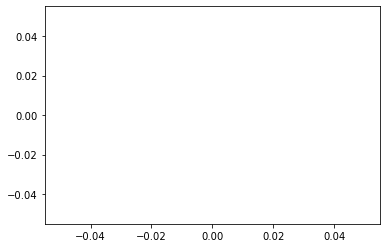

In [34]:
%matplotlib inline

from collections import Counter
import matplotlib.pyplot as plt

fd = Counter(years)
print(fd)
plt.bar(fd.keys(), fd.values())
plt.show()

## Using APIs

### JSON as Tree Data Model
- MongoDB is JSON-style tree database
- JSON as Python dictionay of dictionaries of dictionaries ...

In [35]:
import json
serialized = """{ "title" : "Data Science Book",
                  "author" : "Joel Grus",
                  "publicationYear" : 2014,
                  "topics" : [ "data", "science", "data science"] }"""

# parse the JSON to create a Python dict
deserialized = json.loads(serialized)

In [36]:
deserialized['title']

'Data Science Book'

In [37]:
deserialized['author']

'Joel Grus'

In [26]:
deserialized['publicationYear']

2014

In [27]:
deserialized['topics']

['data', 'science', 'data science']

In [28]:
if "data science" in deserialized["topics"]:
    print(deserialized)

{'title': 'Data Science Book', 'author': 'Joel Grus', 'publicationYear': 2014, 'topics': ['data', 'science', 'data science']}


- To install various parser:
    
https://www.crummy.com/software/BeautifulSoup/bs4/doc/

### XML as Tree Data Model

In [38]:
xml_text = """
<Book>
  <Title>Data Science Book</Title>
  <Author>Joel Grus</Author>
  <PublicationYear>2014</PublicationYear>
  <Topics>
    <Topic>data</Topic>
    <Topic>science</Topic>
    <Topic>data science</Topic>
  </Topics>
</Book>
"""

In [39]:
soup = BeautifulSoup(xml_text, 'lxml')

soup.book

<book>
<title>Data Science Book</title>
<author>Joel Grus</author>
<publicationyear>2014</publicationyear>
<topics>
<topic>data</topic>
<topic>science</topic>
<topic>data science</topic>
</topics>
</book>

Query 1: Find **title** of **book**

In [40]:
soup.book.title

<title>Data Science Book</title>

Query 2: Find **title**'s text of **book**

In [41]:
soup.book.title.text

'Data Science Book'

Query 3: Find **author** of **book**

In [42]:
soup.book.author

<author>Joel Grus</author>

Query 4: Find all **topic** under **topics**

In [43]:
soup.topics('topic')

[<topic>data</topic>, <topic>science</topic>, <topic>data science</topic>]

Query 5: Find second **topic**'s **text** of **topics** of **book**

In [44]:
soup.book.topics('topic')[1].text

'science'

Query 6: Find last **topic** of **book**

In [45]:
soup.book('topic')[-1]

<topic>data science</topic>

Query 7: Loop over all **topic** of **book**

In [46]:
for i, topic in enumerate(soup.book('topic')):
    print('topic {}: {}'.format(i, topic.text))

topic 0: data
topic 1: science
topic 2: data science


(Overall Exercise)

Query 8: Find the **title**'s **text** of all **books**s whose **author** is 'Joel Grus' and **publicationyear** >= 2000

In [47]:
for book in soup('book'):
    if book.author.text == 'Joel Grus' and int(book.publicationyear.text) >= 2000:
        print(book.title.text)

Data Science Book


In [48]:
soup.topic

<topic>data</topic>

In [49]:
soup.topic.text

'data'

In [50]:
soup.find('topic')

<topic>data</topic>

In [51]:
soup.find_all('topic')

[<topic>data</topic>, <topic>science</topic>, <topic>data science</topic>]

In [52]:
soup.text

'\nData Science Book\nJoel Grus\n2014\n\ndata\nscience\ndata science\n\n\n'

### Using an Unauthenticated API

In [53]:
import requests, json
endpoint = "https://api.github.com/users/joelgrus/repos"

repos = json.loads(requests.get(endpoint).text)
repos

[{'id': 112873601,
  'node_id': 'MDEwOlJlcG9zaXRvcnkxMTI4NzM2MDE=',
  'name': 'advent2017',
  'full_name': 'joelgrus/advent2017',
  'private': False,
  'owner': {'login': 'joelgrus',
   'id': 1308313,
   'node_id': 'MDQ6VXNlcjEzMDgzMTM=',
   'avatar_url': 'https://avatars.githubusercontent.com/u/1308313?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/joelgrus',
   'html_url': 'https://github.com/joelgrus',
   'followers_url': 'https://api.github.com/users/joelgrus/followers',
   'following_url': 'https://api.github.com/users/joelgrus/following{/other_user}',
   'gists_url': 'https://api.github.com/users/joelgrus/gists{/gist_id}',
   'starred_url': 'https://api.github.com/users/joelgrus/starred{/owner}{/repo}',
   'subscriptions_url': 'https://api.github.com/users/joelgrus/subscriptions',
   'organizations_url': 'https://api.github.com/users/joelgrus/orgs',
   'repos_url': 'https://api.github.com/users/joelgrus/repos',
   'events_url': 'https://api.github.com/users/j

In [54]:
from dateutil.parser import parse

dates = [parse(repo["created_at"]) for repo in repos]
month_counts = Counter(date.month for date in dates)
weekday_counts = Counter(date.weekday() for date in dates)

print(month_counts)
print(weekday_counts)

Counter({11: 8, 9: 5, 12: 4, 7: 3, 2: 2, 5: 2, 8: 2, 1: 1, 3: 1, 6: 1, 4: 1})
Counter({2: 8, 1: 6, 5: 5, 4: 5, 6: 5, 3: 1})


In [42]:
help(dates[0].weekday)

Help on built-in function weekday:

weekday(...) method of datetime.datetime instance
    Return the day of the week represented by the date.
    Monday == 0 ... Sunday == 6



In [55]:
last_5_repositories = sorted(repos,
                             key=lambda r: r["created_at"],
                             reverse=True)[:5]

last_5_languages = [repo["language"]
                    for repo in last_5_repositories]

last_5_languages

['Svelte', 'Python', 'Python', 'Python', 'Python']

### Finding APIs

- Try searching the Web for “python __ api” to find a library
- Klout API, Yelp API, IMDB API, and so on.
- <a href="http://bit.ly/1L35VOR">Python for Beginners</a>
- <a href="http://www.programmableweb.com">Programmable Web</a>
- <a href="https://www.data.go.kr/">공공데이터포털</a>

- Big Data: API의 시대

https://www.data.go.kr/dataset/15000583/openapi.do

https://www.data.go.kr/dataset/15003419/fileData.do

## Example: Using the Twitter APIs

### Getting Credentials

1. Go to https://apps.twitter.com/.
2. If you are not signed in, click Sign in and enter your Twitter username and password.
3. Click Create New App.
4. Give it a name (such as “Data Science”) and a description, and put any URL as the website (it doesn’t matter which one).
5. Agree to the Terms of Service and click Create.
6. Take note of the consumer key and consumer secret.
7. Click “Create my access token.”
8. Take note of the access token and access token secret (you may have to refresh the page).

### Using Twython

- First we’ll look at the Search API, which requires only the consumer key and secret, not the access token or secret
- Twitter search:
    - https://developer.twitter.com/en/docs/tweets/search/overview
- Twitter search API data format:
    - https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets.html

install twython

In [ ]:
CONSUMER_KEY="....."
CONSUMER_SECRET="....."

In [60]:
from twython import Twython

twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET)

# search for tweets containing the phrase "data science"
for status in twitter.search(q='"한국외대"')["statuses"]:
#     print(status)
    user = status["user"]["screen_name"] #.encode('utf-8')
    text = status["text"] #.encode('utf-8')
    print(user, ":", text)
    print()

TwythonAuthError: Twitter API returned a 401 (Unauthorized), Could not authenticate you.

In [61]:
from twython import Twython

# fill these in if you want to use the code
# CONSUMER_KEY = "..."
# CONSUMER_SECRET = "..."
# ACCESS_TOKEN = "..."
# ACCESS_TOKEN_SECRET = "..."

def call_twitter_search_api():

    twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET)

    # search for tweets containing the phrase "data science"
    for status in twitter.search(q='"손흥민"')["statuses"]:
        user = status["user"]["screen_name"]   #.encode('utf-8')
        text = status["text"]    #.encode('utf-8')
        print(user, ":", text)
        print()

from twython import TwythonStreamer

# appending data to a global variable is pretty poor form
# but it makes the example much simpler
tweets = []

class MyStreamer(TwythonStreamer):
    """our own subclass of TwythonStreamer that specifies
    how to interact with the stream"""

    def on_success(self, data):
        """what do we do when twitter sends us data?
        here data will be a Python object representing a tweet"""

        # only want to collect English-language tweets
        if data['lang'] == 'en':
            tweets.append(data)

        # stop when we've collected enough
#         if len(tweets) >= 1000:
        if len(tweets) >= 10:
            self.disconnect()

    def on_error(self, status_code, data):
        print(status_code, data)
        self.disconnect()

def call_twitter_streaming_api():
    stream = MyStreamer(CONSUMER_KEY, CONSUMER_SECRET,
                        ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

    # starts consuming public statuses that contain the keyword 'data'
    stream.statuses.filter(track='손흥민')


In [62]:
call_twitter_search_api()

TwythonAuthError: Twitter API returned a 401 (Unauthorized), Could not authenticate you.

In [49]:
call_twitter_streaming_api()

NameError: name 'ACCESS_TOKEN' is not defined

In [131]:
def call_twitter_search_api():

    twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET)

    # search for tweets containing the phrase "data science"
    for status in twitter.search(q='"김정은"')["statuses"]:
        user = status["user"]["screen_name"]
        text = status["text"]
        print(user, ":", text)
        print()

In [121]:
for status in twitter.search(q='"손흥민"')["statuses"]:
    user = status["user"]["screen_name"]
    text = status["text"]
    print(user, ":", text)
    print()

Son7_Fcthai : ซนนี่ ชายนี่ เดย์ ☀️

รายละเอียดอื่นๆ เร็วๆ นี้ ติดตามที่ @THENFTSTAR 

#HMSJ07​#HMFCT07​#SON7​#loveSS​#COYS​#THFC​… https://t.co/nRzFScpaDh

Ijc6bvSgdtpXLbU : YS7SA7PO03U

성북 일산 손흥민 여자 배수지 
https://t.co/0J5wodPGai

vxBkN2LZ7OF4iR6 : AZ331G5OFV32M5

#오프 손흥민 노래커버 
https://t.co/Lhn1aMMfCx

bngtnxarmype : RT @Spurs_KR: #WallpaperWednesday 🖼

📲 이번주는 손흥민 선수의 배경화면입니다! 

#THFC #COYS #토트넘 #손흥민 https://t.co/agqGzs6ywJ

yj7spke5f : [통신원수첩] 손흥민 넘어지자 팬들 화들짝

pink_soalt : RT @Spurs_KR: #WallpaperWednesday 🖼

📲 이번주는 손흥민 선수의 배경화면입니다! 

#THFC #COYS #토트넘 #손흥민 https://t.co/agqGzs6ywJ

onehigh4 : “무리뉴 아닌 수석 코치가 문제였어”...‘손흥민 절친’ 오리에, 토트넘 시절 폭로 https://t.co/Ihv1huz8aG 54

onehigh4 : ‘손흥민-케인-쿨루셉스키’ 파괴력 미쳤다...토트넘, 최강 공격력 TOP10 등극 https://t.co/pSo1D9xufS 54

onehigh4 : [오피셜] ‘손흥민-김민재 지도’ 슈미트 감독, 벤피카행…주식시장 공지 https://t.co/7shVMByYxG 54

jaap__1010 : RT @Spurs_KR: 봄봄봄 🌸🌸

#봄 #벚꽃 #THFC #COYS #토트넘 #손흥민 https://t.co/ARsTQHWS3I

vamosweet : 손흥민은 한국 그 자체구나 ㅋㅋㅋ
번역이 잘못된 걸까?? https://t.co/dzjZHdSMfi

r2na

In [59]:
from twython import Twython

# fill these in if you want to use the code
CONSUMER_KEY = "L9c3arjSFPGlaCAqpH07x5PwR"
CONSUMER_SECRET = "RgxfMXXTW8Avdg6DvJ1m3ka6zyOQLXUONWl4CiJdgxOh73KEfF"
ACCESS_TOKEN = "54477215-Wa9lm0qQeMOKBx4zWlO7MmSOoVAKhtHbd55tXDJ4Z"
ACCESS_TOKEN_SECRET = "a8LVkjwEnxKvljMOruoQGvVzHJ883ClZ7Z7ew2Hbp8x7g"